In [53]:
import pythonradex

# # import necessary modules
from pythonradex import radiative_transfer, helpers, LAMDA_file, atomic_transition
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Testing methanol 

In [54]:
# pyhonradex needs a file containing the atomic data, import it, this is a specific file for CO from LAMBDA database
datafilepath = (
    r"C:\Users\alios\OneDrive - University College London\Desktop\UCL\Year3\group project\codes\e_ch3oh.dat"  # file downloaded from LAMDA database
)

data = LAMDA_file.read(datafilepath, read_frequencies=False, read_quantum_numbers=True)

# define the geometry of the nebula
geometry = "uniform sphere"

# define the parameters of the nebula
line_profile_type = "Gaussian"  # line profile, can be "Gaussian",  “rectangular”,"LVG sphere", "LVG slab”
# width_v = 0.5 * constants.kilo  # line width in m/s, costants.kilo is 1 km/s
width_v = 5 * constants.kilo

cloud = radiative_transfer.Cloud(
    datafilepath=datafilepath,
    geometry=geometry,
    line_profile_type=line_profile_type,
    width_v=width_v,
    # treat_line_overlap=True,  # if True, the code will consider the line overlap
)

N = 1e15 / constants.centi**2  # CO column density in m-2
Tkin = 150  # kinetic temperature in [K]


# collider densities in m-3 (phytonradex takes the densities in m-3):
LTE_collider_densities_h2only = {"H2": 5e8 / constants.centi**3}

# define the background radiation field, in this case we assume that the background is zero, z is the redshift
ext_background = helpers.generate_CMB_background(z=0)

# no dust:
T_dust = 0
tau_dust = 0

# use high colliders density to simulate LTE
cloud.update_parameters(
    N=N,
    Tkin=Tkin,
    collider_densities=LTE_collider_densities_h2only,
    ext_background=ext_background,
    T_dust=T_dust,
    tau_dust=tau_dust,
)

# solve the radiative trasfer equation, i.e. calculate the level population with an iterative method
cloud.solve_radiative_transfer()

79-78: tau_nu0 = -0.00189
46-45: tau_nu0 = -0.00363
132-131: tau_nu0 = -2.52e-05
28-27: tau_nu0 = -7.39e-07
58-56: tau_nu0 = -1.5e-07
78-77: tau_nu0 = -1.23e-05
20-19: tau_nu0 = -1.69e-07
13-12: tau_nu0 = -0.0128
18-17: tau_nu0 = -0.0168
10-8: tau_nu0 = -0.00752
23-22: tau_nu0 = -0.02
30-27: tau_nu0 = -0.0224
37-36: tau_nu0 = -0.024
44-43: tau_nu0 = -0.0247
54-53: tau_nu0 = -0.0246
65-64: tau_nu0 = -0.0238
49-48: tau_nu0 = -2.05e-13
79-77: tau_nu0 = -0.0223
92-91: tau_nu0 = -0.0205
105-104: tau_nu0 = -0.018
121-120: tau_nu0 = -0.0153
14-12: tau_nu0 = -0.000925
136-135: tau_nu0 = -0.00713
9-7: tau_nu0 = -0.01
86-85: tau_nu0 = -0.00466
10-7: tau_nu0 = -2.96e-08
92-89: tau_nu0 = -0.00146
59-56: tau_nu0 = -0.003
117-116: tau_nu0 = -2.02e-05
38-36: tau_nu0 = -9.94e-07
49-45: tau_nu0 = -1.24e-08
13-11: tau_nu0 = -1.74e-10
66-64: tau_nu0 = -9.78e-06
15-14: tau_nu0 = -6.32e-08
58-55: tau_nu0 = -8.38e-13
19-17: tau_nu0 = -0.000609
16-14: tau_nu0 = -0.0104
75-73: tau_nu0 = -0.00409
105-103: tau_

c:\Users\alios\AppData\Local\Programs\Python\Python312\Lib\site-packages\pythonradex\radiative_transfer.py:110: UserWarning: some lines are overlapping, but treatement of overlapping lines not activated
  warnings.warn('some lines are overlapping, but treatement of'
c:\Users\alios\AppData\Local\Programs\Python\Python312\Lib\site-packages\pythonradex\radiative_transfer.py:333: UserWarning: negative optical depth!
  warnings.warn('negative optical depth!')


In [ ]:
# store the data
#

# # Initialize g_weigth
# levels = data["levels"]
# rad_transitions = data["radiative transitions"]
# coll_transitions = data["collisional transitions"]
# quantum_numbers = data["quantum numbers"]


In [56]:
# selected_quantum_numbers_with_indices = [(i, qn) for i, qn in enumerate(quantum_numbers) if qn.split("_")[1] == "1"]
# indices = [i for i, qn in selected_quantum_numbers_with_indices]
# print(indices)

# my class

In [170]:
class MyClass:
    def __init__(self, cloud_name, data_of_molecule, column_density_species, width_v):
        """
        Initialize the class with the cloud object, the data of the molecule, the column density of the species, the width of the line

        Parameters
        ----------
        cloud_name : pythonradex.Cloud
            The cloud object.
        data_of_molecule : dict
            The data of the molecule. It should contain the levels, radiative transitions, quantum numbers, and the molecule name. This is the output of the LAMDA_file.read_file() function.
        column_density_species : float
            The column density of the species in m^2.
        width_v : float
            The width of the line in m/s
        Tkin : float
            The kinetic temperature in [K].
        """
        self.cloud_name = cloud_name
        self.data_of_molecule = data_of_molecule
        self.column_density_species = column_density_species
        self.width_v = width_v
        self.extract_and_calculate(debug=False)  # this allows optical_depth to use the extracted values from the extract_and_calculate method

    def get_transition_populations(self, names_transitions, debug=False):
        """
        Relates all the transitions in names_transitions with their corresponding population densities.

        Parameters
        ----------
        names_transitions: (list of str):
            List of transitions in the format ['79-78', '14-13', ...], where each element is a string with the format "upper_level-lower_level".

        Returns
        -------
            tuple: Two arrays, one for upper and one for lower populations density.
        """
        upper_populations = []
        lower_populations = []
        self.upper_level_transition_index = []
        self.lower_level_transition_index = []
        if debug:
            print("num_transitions:", len(names_transitions))

        for transition in names_transitions:
            upper_level, lower_level = map(int, transition.split("-"))  # split the string and convert to integers
            upper_pop = self.cloud_name.level_pop[upper_level]
            lower_pop = self.cloud_name.level_pop[lower_level]
            upper_populations.append(upper_pop)
            lower_populations.append(lower_pop)
            self.upper_level_transition_index.append(upper_level)
            self.lower_level_transition_index.append(lower_level)

        nu = np.array(upper_populations)
        nl = np.array(lower_populations)
        # compute upper level population density, given by: fractional population density x total column density
        Nu = nu * self.column_density_species
        Nl = nl * self.column_density_species
        return Nu, Nl

    def extract_and_calculate(self, debug=False):
        """
        Extract values from the cloud object and the data file, and calculate gamma factor

        Parameters
        ----------
        debug : boolean, optional
            If True, print debugging information. Default is False.

        Returns
        --------
        Tex: np.array
            The excitation temperature of the molecule.
        tau: np.array
            The optical depth of the transitions.
        Aul : np.array
            The Einstein coefficient for spontaneous emission [s^-1].
        Bul : np.array
            The Einstein coefficient for stimulated emission in [sr m2 Hz / Jy].
        nu0_array : np.array
            The rest frequency of the transition in Hz.
        Eu : np.array
            The energy of the upper level in [K].
        gu : np.array
            The statistical weight of the upper level.
        gamma: np.array
            Gamma factors, which is calculated using: gamma = (8 * np.pi * k * nu0**2) / (h * c**3 * Aul)
        Nu: np.array
            Upper level population density in [m-2].
        Nl: np.array
            Lower level population density in [m-2].
        FWHM_each_transition: np.array
            Frequency width of each transition in [Hz].
        """
        # Extract values
        self.Tex = self.cloud_name.Tex
        self.Aul = self.cloud_name.emitting_molecule.A21
        self.Bul = self.cloud_name.emitting_molecule.B21
        self.nu0_array = self.cloud_name.emitting_molecule.nu0
        self.tau = self.cloud_name.tau_nu(self.nu0_array)

        # levels = self.data_of_molecule["levels"]
        rad_transitions = self.data_of_molecule["radiative transitions"]

        # Extract upper energy levels in [J] and convert to Kelvin
        self.Eu = np.array([transition.up.E for transition in rad_transitions]) / constants.k

        # Get the statistical weight of the upper and lower levels
        self.gu = np.array([transition.up.g for transition in rad_transitions])
        self.glow = np.array([transition.low.g for transition in rad_transitions])

        # Get names of transitions
        names_transitions = np.array([tran.name for tran in rad_transitions])

        # Compute upper and lower level population densities
        self.Nu, self.Nl = self.get_transition_populations(names_transitions, debug=debug)

        # Convert velocity width to frequency width
        self.FWHM_each_transition = self.nu0_array * (self.width_v / constants.c)

        # Calculate gamma factor
        self.gamma = (8 * np.pi * constants.k * self.nu0_array**2) / (constants.h * constants.c**3 * self.Aul)

        if debug:
            # Debugging print statements
            print("Size of nu0_array:", len(self.nu0_array))
            print("Size of Eu:", len(self.Eu))
            print("E upper levels:", self.Eu)
            print("Size of gu:", len(self.gu))
            print("size exitation temperature Tex:", len(self.Tex))
            print(" gu:", self.gu)
            print("Size of glow:", len(self.glow))
            print(" glow:", self.glow)
            print("size Aul:", len(self.Aul))
            print("size FWHM_each_transition:", len(self.FWHM_each_transition))
            print("size gamma:", len(self.gamma))
            print("size Nu:", len(self.Nu))
            print("size Nl:", len(self.Nl))

        return (
            self.Tex,
            self.tau,
            self.Aul,
            self.Bul,
            self.nu0_array,
            self.Eu,
            self.gu,
            self.glow,
            self.gamma,
            self.Nu,
            self.Nl,
            self.FWHM_each_transition,
        )

    def get_selected_variables(self, k_quantum_number, j_lower_limit, j_upper_limit, debug=False):
        """
        Returns the variables in extract_and_calculate which have indices selected by the given k_quantum_number and J quantum number range.

        Parameters
        ----------
        k_quantum_number : str
            The k quantum number to filter the quantum numbers.
        j_lower_limit : int
            The starting J quantum number for filtering.
        j_upper_limit : int
            The ending J quantum number for filtering.
        debug : boolean, optional
            If True, print debugging information. Default is False.

        Returns
        -------
        dict
            Dictionary containing the selected variables.
        list
            List of indices of the selected transitions.
        """
        indices = [
            i
            for i, (upper_transition, lower_transition) in enumerate(zip(self.upper_level_transition_index, self.lower_level_transition_index))
            if (
                self.data_of_molecule["quantum numbers"][upper_transition].split("_")[1] == k_quantum_number
                and j_lower_limit <= int(self.data_of_molecule["quantum numbers"][upper_transition].split("_")[0]) <= j_upper_limit
                and abs(
                    int(self.data_of_molecule["quantum numbers"][upper_transition].split("_")[1])
                    - int(self.data_of_molecule["quantum numbers"][lower_transition].split("_")[1])
                )
                in [1]
                and abs(
                    int(self.data_of_molecule["quantum numbers"][upper_transition].split("_")[0])
                    - int(self.data_of_molecule["quantum numbers"][lower_transition].split("_")[0])
                )
                in [0, 1]
            )
        ]
        if debug:
            print(
                "Indices of the transitions that have the selected k quantum number and J range",
                indices,
            )
            print("upper level transition index", self.upper_level_transition_index)
            print("lower level transition index", self.lower_level_transition_index)
            print(
                "Quantum numbers of upper transitions:",
                [self.data_of_molecule["quantum numbers"][i] for i in self.upper_level_transition_index],
            )
            print(
                "Quantum numbers of lower transitions:",
                [self.data_of_molecule["quantum numbers"][i] for i in self.lower_level_transition_index],
            )

        # selected all the variable that have the specified k quantum number
        selected_vars = {
            "Tex": self.Tex[indices],
            "tau": self.tau[indices],
            "Aul": self.Aul[indices],
            "Bul": self.Bul[indices],
            "nu0_array": self.nu0_array[indices],
            "Eu": self.Eu[indices],
            "gu": self.gu[indices],
            "glow": self.glow[indices],
            "gamma": self.gamma[indices],
            "Nu": self.Nu[indices],
            "Nl": self.Nl[indices],
            "FWHM_each_transition": self.FWHM_each_transition[indices],
        }

        return selected_vars, indices


In [171]:
Tkin = 150  # kinetic temperature in [K]

# extract the data from the cloud object and the data file
CH3OH_instance = MyClass(cloud, data, N, width_v)


# data for k values

In [172]:
# get values for specific k quantum number
data_k0, indicesk1 = CH3OH_instance.get_selected_variables("-3", 3, 11, debug=False)

# print("upper Eu",data_k0["Eu"])


In [173]:
print("rest frequqncy :", data_k0["nu0_array"] / 1e9)

print("tau", data_k0["tau"])
print("index of the transitions:", indicesk1)

rest frequqncy : [   7.28495673  183.71281826  232.93873987  281.95480675  330.79099816
  379.50727258  428.07365078  476.61004973  525.05651094  573.47299291
  764.8005396   765.5200415   766.02968868  766.38943963  766.65925284
  766.80914907  766.89908681  766.9590453   766.98902455  912.11855346
  960.47507694 1008.80162117 1057.09818615 1105.39475114 1153.54141989
 1201.62813016 1249.59492344 1297.38184124]
tau [0.00499361 0.00796125 0.0086977  0.00910702 0.00915523 0.00871416
 0.00772934 0.00619054 0.00417648 0.00192273 0.03900612 0.04185161
 0.04368776 0.04412999 0.04288359 0.03974405 0.03439704 0.02660702
 0.01567382 0.04948688 0.05078608 0.05178382 0.05211572 0.05166463
 0.05028541 0.04803865 0.04498791 0.04124629]
index of the transitions: [2, 194, 249, 301, 371, 428, 480, 542, 600, 677, 906, 907, 908, 909, 910, 912, 913, 914, 915, 1046, 1067, 1102, 1141, 1163, 1183, 1219, 1240, 1290]


In [174]:
print("Eu", data_k0["Eu"])

Eu [215.89566435 215.89566435 190.37032377 167.16285274 146.27469003
 127.70727442 111.45772837  97.5303682   85.92375512  76.63788916
 215.89566435 190.37032377 167.16285274 146.27469003 127.70727442
 111.45772837  97.5303682   85.92375512  76.63788916  76.63788916
  85.92375512  97.5303682  111.45772837 127.70727442 146.27469003
 167.16285274 190.37032377 215.89566435]


In [175]:
# compute the flux from the cloud
distance_observer = 100 * constants.parsec  # distance between the observer and the cloud in m
source_radius = 10 * constants.au  # radius of the source in m
# solid angle of the source
source_solid_angle = source_radius**2 * np.pi / distance_observer**2

freq_index = list(range(150))

flux = cloud.fluxes_of_individual_transitions(transitions=indicesk1, solid_angle=source_solid_angle)

In [176]:
flux

array([4.31566853e-30, 2.53104052e-24, 6.82239232e-24, 1.47293835e-23,
       2.68779614e-23, 4.25252160e-23, 5.86668522e-23, 6.94585483e-23,
       6.65013230e-23, 4.21203334e-23, 2.22277324e-21, 2.40375698e-21,
       2.52457609e-21, 2.56516676e-21, 2.50632903e-21, 2.33335702e-21,
       2.02998836e-21, 1.57664322e-21, 9.38024105e-22, 5.29177406e-21,
       6.38570351e-21, 7.64070991e-21, 8.95775186e-21, 1.02517640e-20,
       1.14310065e-20, 1.24168696e-20, 1.31398284e-20, 1.35600217e-20])

In [177]:
def gaussian(x, amp, cen, fwhm):
    """Gaussian function with amplitude, center, and FWHM as parameters

    Parameters
    ----------
    x : array_like
        The frequency axis
    amp : float
        Amplitude of the Gaussian
    cen : float
        Center of the Gaussian
    fwhm : float
        Full Width at Half Maximum of the Gaussian

    Returns
    -------
    array_like
        The Gaussian function evaluated at the frequency axis x
    """
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return amp * np.exp(-((x - cen) ** 2) / (2 * sigma**2))


def model_spectrum(x, params):
    """
    Create spectrum, sum of Gaussians.

    Parameters:
        x: array-like, the independent variable (e.g., wavelength)
        params: list or array of parameters. For n Gaussians, params should be of length 3*n,
                where each Gaussian has [amp, cen, fwhm] in order.

    Returns:
        The sum of Gaussians evaluated at x.
    """
    n_gauss = len(params) // 3
    total = np.zeros_like(x)
    for i in range(n_gauss):
        amp = params[3 * i]
        cen = params[3 * i + 1]
        fwhm = params[3 * i + 2]
        total += gaussian(x, amp, cen, fwhm)
    return total


In [178]:
fwhm = data_k0["FWHM_each_transition"]

In [179]:
nu_rest = data_k0["nu0_array"]

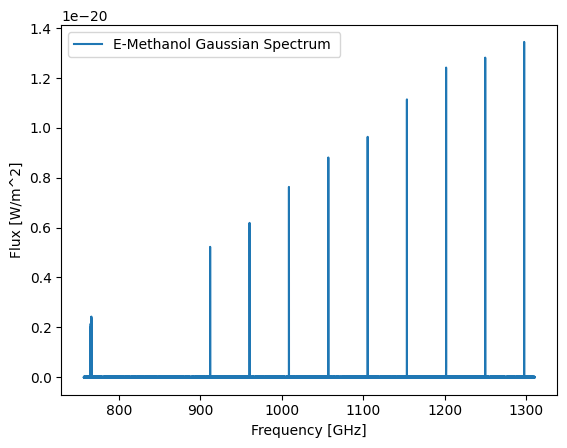

In [182]:
# number of transitions to plot in spectrum
n_trans_spectrum = len(nu_rest)

# generate frequency space
x = np.linspace(nu_rest[10] * 0.99, nu_rest[-1] * 1.01, int(1e5))

# compute the offset using V_LSR
# V_LSR = 0.0001 * constants.c
V_LSR = 0.3

nu0_arrayCH3OH_observed = nu_rest * (1 - (V_LSR * 100) / constants.c)

params_observed = []
params_rest = []
for i in range(n_trans_spectrum):
    params_observed.extend([flux[i], nu0_arrayCH3OH_observed[i], fwhm[i]])
    # params_rest.extend([flux_methanol[i], nu0_arrayCH3OH[i], realistic_fwhm[i]])

# Generate the spectra
no_noise_spectrum_observed = model_spectrum(x, params_observed)
# no_noise_spectrum_rest = model_spectrum(x, params_rest)

noise_std_observed = 0.0005 * np.max(no_noise_spectrum_observed)
# noise_std_rest = 0.0005 * np.max(no_noise_spectrum_rest)

observed_spectrum = no_noise_spectrum_observed + np.random.normal(0, noise_std_observed, len(x))
# spectrum_rest = no_noise_spectrum_rest + np.random.normal(0, noise_std_rest, len(x))

# Plot the spectra
fig, ax = plt.subplots()
plt.plot(x / constants.giga, observed_spectrum, label="E-Methanol Gaussian Spectrum ")
# plt.plot(x / constants.giga, spectrum_rest, label="Gaussian Spectrum with Rest nu")
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"Flux [W/m^2]")
plt.legend()
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
C:\Users\alios\AppData\Local\Temp\ipykernel_31580\2114777217.py:39: SyntaxWarning: invalid escape sequence '\c'
  label=(f"Fit K=0: $T_{{ex}}$ = {T_ex_k0:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k0:.5g}"),


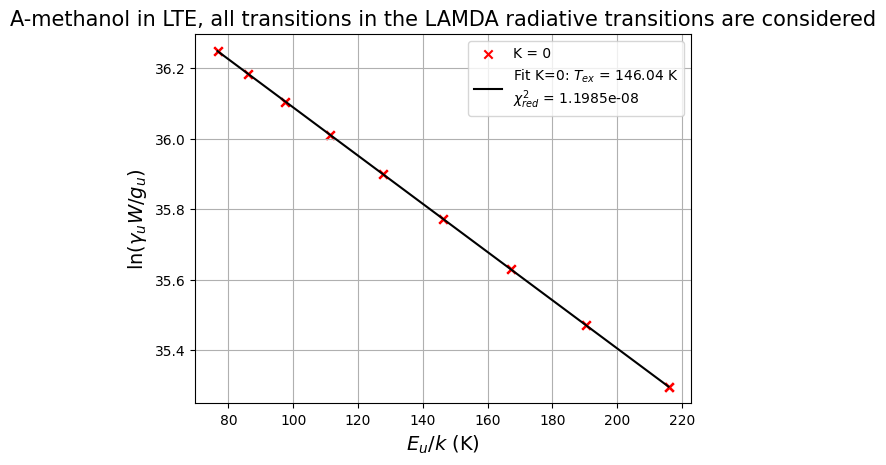

In [181]:
# Take only N first transitions
# firstN_transitions = 800

# calculate get y values using column density of the upper level
y_values_metanol_k0 = np.log(data_k0["Nu"] / data_k0["gu"])

# plot population diagram
fig, ax = plt.subplots()
plt.scatter(data_k0["Eu"], y_values_metanol_k0, marker="x", color="red", label="K = 0")

plt.xlabel(r"$E_u/k$ (K)", fontsize=14)
plt.ylabel(r"$\ln(\gamma_u W / g_u)$", fontsize=14)
plt.title(
    "A-methanol in LTE, all transitions in the LAMDA radiative transitions are considered",
    fontsize=15,
)

# Fit a straight line to estimate T_ex for K=0
fit_k0 = np.polyfit(data_k0["Eu"], y_values_metanol_k0, 1)  # Linear fit
T_ex_k0 = -1 / fit_k0[0]  # Rotational temperature from slope

# Calculate the fitted y-values for K=0
x_fit_k0 = np.linspace(min(data_k0["Eu"]), max(data_k0["Eu"]), 100)
y_fit_k0 = fit_k0[0] * x_fit_k0 + fit_k0[1]

# Calculate chi-squared for K=0
y_fit_observed_k0 = fit_k0[0] * data_k0["Eu"] + fit_k0[1]
chi_squared_k0 = np.sum(((y_values_metanol_k0 - y_fit_observed_k0) ** 2) / y_fit_observed_k0)

# reduced chi_squared: chi_squared / (num_point - num_parameters), num_parameters = 1 for a straight line
chi_squared_red_k0 = chi_squared_k0 / (len(data_k0["Eu"]) - 2)

# Plot the best-fit line for K=0
plt.plot(
    x_fit_k0,
    y_fit_k0,
    linestyle="-",
    color="black",
    label=(f"Fit K=0: $T_{{ex}}$ = {T_ex_k0:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k0:.5g}"),
)

plt.legend()
ax.grid()
plt.show()
